# Part 1 : Euler–Mascheroni constant

## Part a:

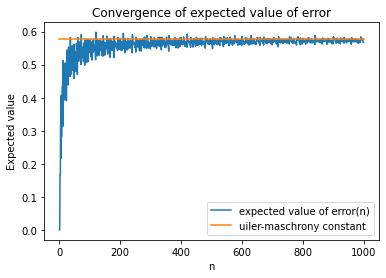

The expected value of error for n=500 0.5631765700094754
The expected value of error for n=1000 0.5675291394496552


In [1]:
# 'E_er' function for show the Convergence of expected value of error
import numpy as np
from matplotlib import pyplot as plt
def E_er(max):
    En=np.zeros(max)
    for n in range(1,max+1):
        for r in range(1,n+1):
            En[n-1]+=(np.ceil(n/r)-n/r)*(1/n)
    return En
def draw_Ex(E,cons):
    plt.plot(E,label='expected value of error(n)')
    plt.plot([0,len(E)],[cons,cons],label='uiler-maschrony constant')
    plt.title('Convergence of expected value of error')
    plt.xlabel('n')
    plt.ylabel('Expected value')
    plt.legend()
    plt.show()
    print('The expected value of error for n=500',E[499])
    print('The expected value of error for n=1000',E[999])
n,cons=1000,0.5772
E=E_er(n)
draw_Ex(E,cons)

## Part b:

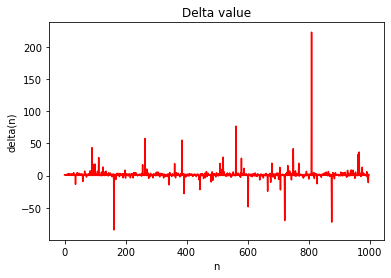

In [2]:
def delta_cal(E,cons):
    delta=np.zeros(len(E)-1)
    for n in range(len(E)-1):
        delta[n]=(E[n+1]-cons)/(E[n]-cons)
    return delta
def draw_del(dalta):
    plt.plot(delta,'r')
    plt.title('Delta value')
    plt.xlabel('n')
    plt.ylabel('delta(n)')
    plt.show()
delta=delta_cal(E,cons)
draw_del(delta)

# Part 2: Newton–Pepys problem 

## Part b:

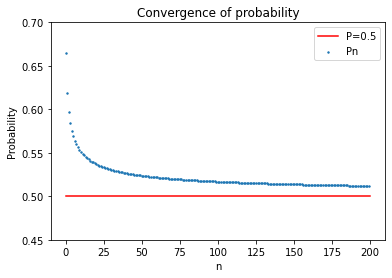

The probability for n=200 : P = 0.512016159739094


In [3]:
import numpy as np
from matplotlib import pyplot as plt
def comb(n,k):
    C=np.math.factorial(n)/(np.math.factorial(n-k)*np.math.factorial(k))
    return C
def P(max):
    Pn=np.zeros(max)
    for n in range(1,max+1):
        Sigma=0
        for i in range(n):
            Sigma+=comb(6*n,i)*(1/6)**i*(5/6)**(6*n-i)
        Pn[n-1]=1-Sigma
    return Pn
def draw_plot(P):
    plt.scatter(range(len(P)),P,s=2,label='Pn')
    plt.plot([0,200],[0.5,0.5],'r',label='P=0.5')
    plt.ylim(0.45,0.7)
    plt.title('Convergence of probability')
    plt.xlabel('n')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()
    print('The probability for n=200 : P =',P[len(P)-1])
n=200
draw_plot(P(n))

# Part 3: Euler constant estimation using Monte Carlo method

## Part c:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def find_e(minXY,maxXY,n):
    X=np.random.uniform(minXY, maxXY, (n,2))
    n_red=0
    for i in range(n):
        if X[i][1]<=np.exp(-X[i][0]):
            n_red+=1
    P=n_red/n
    S=P/(2-P)
    e_hat=2/(1-S)
    return e_hat
minXY=[0,np.exp(-1)]
maxXY=[1,1]
n=100
print(f'The estimation of the Euler constant is : {find_e(minXY,maxXY,n)}')

The estimation of the Euler constant is : 2.7241379310344827


## Part d:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
def find_e(minXY,maxXY,n):
    X=np.random.uniform(minXY, maxXY, (n,2))
    n_red=0
    for i in range(n):
        if X[i][1]<=np.exp(-X[i][0]):
            n_red+=1
    P=n_red/n
    S=P/(2-P)
    e_hat=2/(1-S)
    return e_hat
def MLE(minXY,maxXY,n):
    X=np.zeros(100)
    for i in range(n):
        X[i]=find_e(minXY,maxXY,n)
    mu=1/n*sum(X)
    sigma=1/n*sum((X-mu)**2)
    print(f'The MLE Mean is :{mu}\nand the MLE variance is :{sigma}')
minXY=[0,np.exp(-1)]
maxXY=[1,1]
n=100
MLE(minXY,maxXY,n)

The MLE Mean is :2.7259141284744017
and the MLE variance is :0.020750612781410122


## Part e:

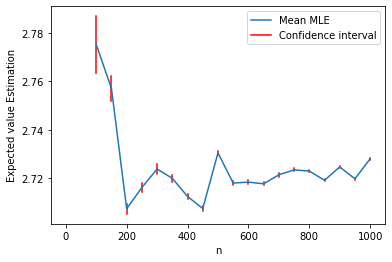

In [33]:
import numpy as np
import matplotlib.pyplot as plt
def find_e(minXY,maxXY,n):
    X=np.random.uniform(minXY, maxXY, (n,2))
    n_red=0
    for i in range(n):
        if X[i][1]<=np.exp(-X[i][0]):
            n_red+=1
    P=n_red/n
    if P==1: return 0
    S=P/(2-P)
    e_hat=2/(1-S)
    return e_hat
def MLE(minXY,maxXY,n):
    X=np.zeros(100)
    for i in range(100):
        X[i]=find_e(minXY,maxXY,n)
    mu=1/100*sum(X)
    sigma=1/100*sum((X-mu)**2)
    plt.plot([n+50,n+50],[mu-sigma*0.196,mu+sigma*0.196],'r')
    return mu
def mleE_draw(minXY,maxXY):
    E=np.zeros(19)
    n=50
    for i in range(19):
        E[i]=MLE(minXY,maxXY,n)
        n+=50
    plt.plot(np.linspace(100,1000,19),E,label='Mean MLE')
minXY=[0,np.exp(-1)]
maxXY=[1,1]
mleE_draw(minXY,maxXY)
plt.plot(2.72,'r',label='Confidence interval')
plt.xlabel('n')
plt.ylabel('Expected value Estimation')
plt.legend()
plt.show()

# Part 4: Random Fibonacci sequence

## Part a:

In [24]:
import numpy as np
def f(n):
    rnd=[-1,1]
    seq=np.ones(n+1)
    for i in range(2,n+1):
        seq[i]=seq[i-1] + (np.random.choice(rnd) * seq[i-2])
    return abs(seq[n])
def Con_interval(Xn_,Sn2,n):
    min_inv=Xn_-1.96*(Sn2/n)**(1/2)
    max_inv=Xn_+1.96*(Sn2/n)**(1/2)
    print(f'Confidence interval for {n} samples: ({min_inv},{max_inv})')
def sampling(n):
    alpha=np.zeros(n)
    X=np.zeros(n)
    for i in range(n):
        X[i]=f(i)
        alpha[i]=X[i]**(1/(i+1))
    Xn_=np.sum(alpha)/n
    Sn2=1/(n-1)*np.sum((alpha-Xn_)**2)
    Con_interval(Xn_,Sn2,n)
sampling(100)
sampling(200)
sampling(300)         

Confidence interval for 100 samples: (1.115274774574683,1.1426912528974498)
Confidence interval for 200 samples: (1.095240278837691,1.130106210670789)
Confidence interval for 300 samples: (1.1053360870367859,1.1330309679264137)


## Part b:

λ = 0.012988193731897704


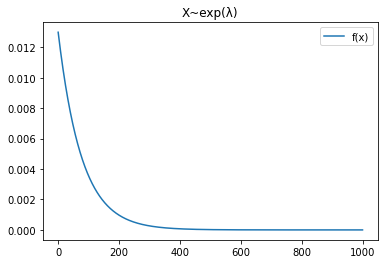

In [25]:
import numpy as np
import matplotlib.pyplot as plt
def f(n):
    rnd=[-1,1]
    seq=np.ones(n+1)
    for i in range(2,n+1):
        seq[i]=seq[i-1] + (np.random.choice(rnd) * seq[i-2])
    return abs(max(seq))
def sampling(n):
    X=np.zeros(n)
    for i in range(n):
        X[i]=f(25)
    lam=n/np.sum(X)
    return lam
def draw_f(lam):
    x=range(1000)
    plt.title('X~exp(\u03BB)')
    plt.plot(x,lam*np.exp(-lam*x),label='f(x)')
    plt.legend()
lam=sampling(1000)
print(f'\u03BB = {lam}')
draw_f(lam)

## Part c:

λ = 0.01439055979277594


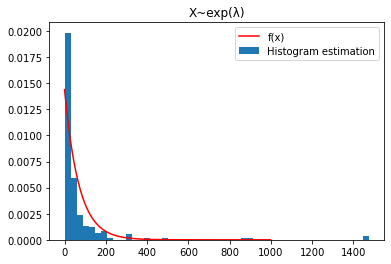

In [26]:
import numpy as np
import matplotlib.pyplot as plt
def f(n):
    rnd=[-1,1]
    seq=np.ones(n+1)
    for i in range(2,n+1):
        seq[i]=seq[i-1] + (np.random.choice(rnd) * seq[i-2])
    return abs(max(seq))
def sampling(n):
    X=np.zeros(n)
    for i in range(n):
        X[i]=f(25)
    lam=n/np.sum(X)
    return X,lam
def draw_f(lam,X):
    x=range(1000)
    plt.title('X~exp(\u03BB)')
    plt.hist(X,50,density=True,label='Histogram estimation')
    plt.plot(x,lam*np.exp(-lam*x),'r',label='f(x)')
    plt.legend()
X,lam=sampling(200)
print(f'\u03BB = {lam}')
draw_f(lam,X)

## Part d:

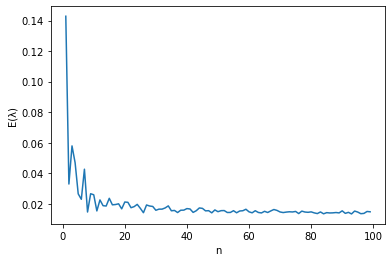

In [27]:
import numpy as np
import matplotlib.pyplot as plt
def f(n):
    rnd=[-1,1]
    seq=np.ones(n+1)
    for i in range(2,n+1):
        seq[i]=seq[i-1] + (np.random.choice(rnd) * seq[i-2])
    return abs(max(seq))
def sampling(n):
    X=np.zeros(n)
    for i in range(n):
        X[i]=f(25)
    lam=n/np.sum(X)
    return lam
def E(num):
    E_lam=np.zeros(num-1)
    for i in range(1,num):
        LAM=0
        for j in range(i):
            LAM+=sampling(i) 
        E_lam[i-1]=LAM/i
    plt.plot(range(1,num),E_lam)
    plt.xlabel('n')
    plt.ylabel('E(\u03BB)')
E(100)

# Part 5: Circular rule for matrix eigenvalues

## Part a:

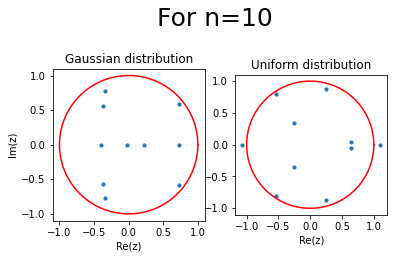

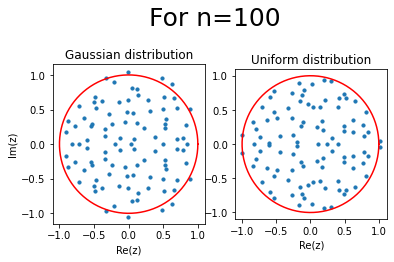

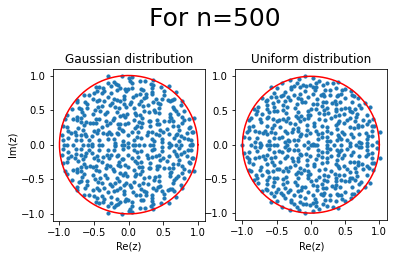

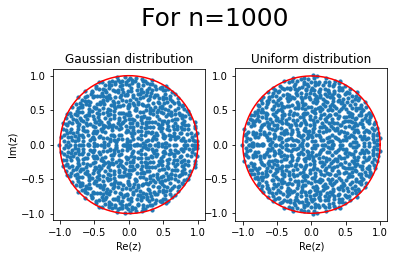

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt
def guassian(n,ax):
    mu,sig=0,1/np.sqrt(n)
    X=np.random.normal(mu, sig, size=(n,n))
    lamG=np.linalg.eigvals(X)
    ax.set_title('Gaussian distribution')
    ax.set(xlabel='Re(z)',ylabel='Im(z)')
    draw_plot(ax,lamG)
def uniform(n,ax):
    a,b=-(3/n)**(1/2), (3/n)**(1/2)
    X=np.random.uniform(a,b, size=(n,n))
    lamU=np.linalg.eigvals(X)
    ax.set_title('Uniform distribution')
    ax.set(xlabel='Re(z)')
    draw_plot(ax,lamU)
def draw_plot(ax,lam):
    theta = np.linspace(0, 2*np.pi, 100)
    ax.plot(np.cos(theta),np.sin(theta),'r')
    ax.scatter(lam.real,lam.imag,s=10)
    ax.set_aspect('equal')
def cir_rule(n):
    fig,(ax1,ax2)=plt.subplots(1,2)
    fig.suptitle(f'For n={n}', fontsize=25)
    guassian(n,ax1)
    uniform(n,ax2)
cir_rule(10)
cir_rule(100)
cir_rule(500)
cir_rule(1000)

## Part b:

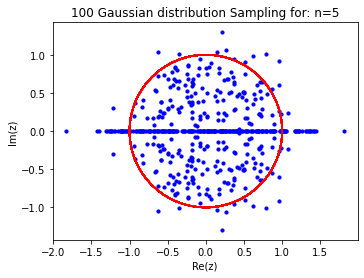

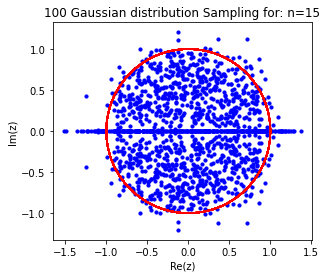

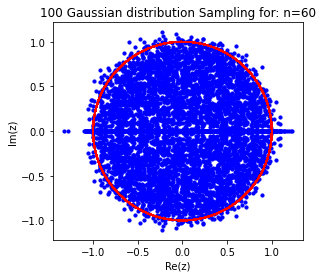

In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt
def guassian(n,ax):
    mu,sig=0,1/np.sqrt(n)
    for i in range(100):
        X=np.random.normal(mu, sig, size=(n,n))
        lamG=np.linalg.eigvals(X)
        draw_plot(ax,lamG)
    ax.set_title(f'100 Gaussian distribution Sampling for: n={n}')
    ax.set(xlabel='Re(z)',ylabel='Im(z)')
def draw_plot(ax,lam):
    theta = np.linspace(0, 2*np.pi, 100)
    ax.plot(np.cos(theta),np.sin(theta),'r')
    ax.scatter(lam.real,lam.imag,color='blue',s=10)
    ax.set_aspect('equal')
def cir_rule(n):
    fig,(ax)=plt.subplots(1,1)
    guassian(n,ax)
cir_rule(5)
cir_rule(15)
cir_rule(60)

# Part 6: Check data

## Part a-a:

In [30]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt

titles = ["height","width","length","num_of_doors","body_style","engine_size"]
Attributes = ps.read_csv('E:\Desktop\Automobile_data.csv',usecols=titles)
width = Attributes.width.to_list()
height = Attributes.height.to_list()
length=Attributes.length.to_list()
num_of_doors=Attributes.num_of_doors.to_list()
body_style=Attributes.body_style.to_list()
engine_size=Attributes.engine_size.to_list()

Part i:

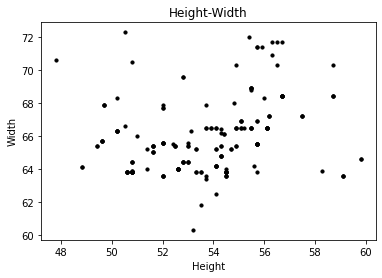

In [32]:
plt.scatter(height,width,color='black',s=10)
plt.title('Height-Width')
plt.xlabel('Height')
plt.ylabel('Width')
plt.show()

Part ii:

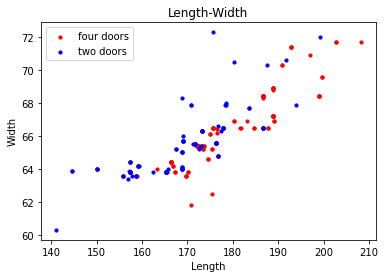

In [35]:
four_W,four_L,two_W,two_L=[],[],[],[]
for i in range(205):
    if num_of_doors[i]=="four":
        four_W.append(width[i])
        four_L.append(length[i])
    else:
        two_W.append(width[i])
        two_L.append(length[i])
plt.scatter(four_L,four_W,color='red',s=10,label='four doors')
plt.scatter(two_L,two_W,color='blue',s=10,label='two doors')
plt.title('Length-Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

Part iii:

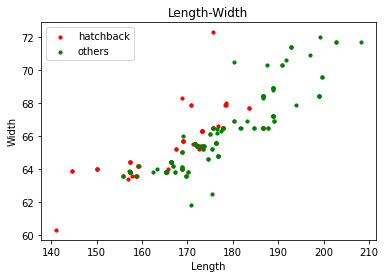

In [36]:
hatchback_W,hatchback_L,other_W,other_L=[],[],[],[]
for i in range(205):
    if body_style[i]=="hatchback":
        hatchback_W.append(width[i])
        hatchback_L.append(length[i])
    else:
        other_W.append(width[i])
        other_L.append(length[i])
plt.scatter(hatchback_L,hatchback_W,color='red',s=10,label='hatchback')
plt.scatter(other_L,other_W,color='green',s=10,label='others')
plt.title('Length-Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

Part iv:

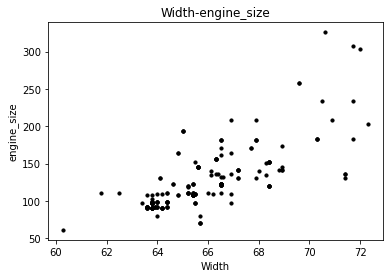

In [37]:
plt.scatter(width,engine_size,color='black',s=10)
plt.title('Width-engine_size')
plt.xlabel('Width')
plt.ylabel('engine_size')
plt.show()

## Part a-b:

In [62]:
titles = ["height","width","length","num_of_cylinders","body_style","engine_size","city_mpg"]
Attributes = ps.read_csv('E:\Desktop\Automobile_data.csv',usecols=titles)
width = Attributes.width.to_list()
height = Attributes.height.to_list()
length=Attributes.length.to_list()
num_of_cylinders=Attributes.num_of_cylinders.to_list()
body_style=Attributes.body_style.to_list()
engine_size=Attributes.engine_size.to_list()
city_mpg=Attributes.city_mpg.to_list()

1st supposition:

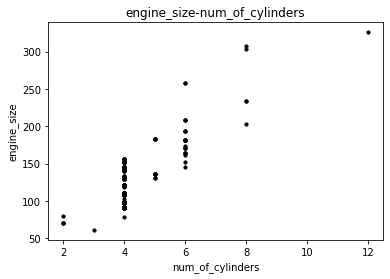

In [40]:
for i in range(205):
    if num_of_cylinders[i]=="two": num_of_cylinders[i]=2
    elif num_of_cylinders[i]=="three": num_of_cylinders[i]=3
    elif num_of_cylinders[i]=="four": num_of_cylinders[i]=4
    elif num_of_cylinders[i]=="five": num_of_cylinders[i]=5
    elif num_of_cylinders[i]=="six": num_of_cylinders[i]=6
    elif num_of_cylinders[i]=="eight": num_of_cylinders[i]=8
    elif num_of_cylinders[i]=="twelve": num_of_cylinders[i]=12
plt.scatter(num_of_cylinders,engine_size,color='black',s=10)
plt.title('engine_size-num_of_cylinders')
plt.xlabel('num_of_cylinders')
plt.ylabel('engine_size')
plt.show()

2nd supposition:

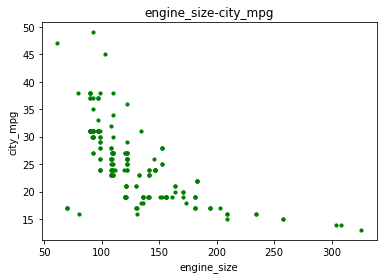

In [41]:
plt.scatter(engine_size,city_mpg,color='green',s=10)
plt.title('engine_size-city_mpg')
plt.ylabel('city_mpg')
plt.xlabel('engine_size')
plt.show()

3rd supposition:

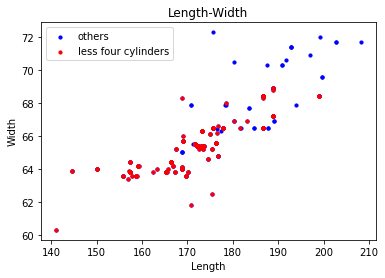

In [66]:
four_W,four_L,two_W,two_L=[],[],[],[]
for i in range(205):
    if num_of_cylinders[i]=="four" or num_of_cylinders[i]=="two" or num_of_cylinders[i]=="three" :
        four_W.append(width[i])
        four_L.append(length[i])
    else:
        two_W.append(width[i])
        two_L.append(length[i])
plt.scatter(other_L ,other_W ,color='blue',s=10,label='others')
plt.scatter(four_L ,four_W ,color='red',s=10,label='less four cylinders')
plt.title('Length-Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

## Part a-c:

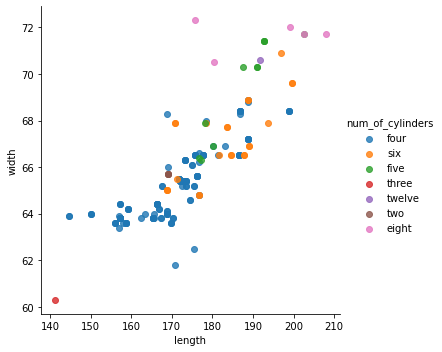

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titles = ["width","num_of_cylinders","length"]
Attributes = pd.read_csv('E:\Desktop\Automobile_data.csv',usecols=titles)
sns.lmplot(x = 'length', y = 'width',data = Attributes,hue= "num_of_cylinders", fit_reg=False)
sns.despine()

## Part a-d:

In [67]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt

titles = ["make","engine_type","length","city_mpg","fuel_type","num_of_cylinders"]
Attributes = ps.read_csv('E:\Desktop\Automobile_data.csv',usecols=titles)
make = Attributes.make.to_list()
engine_type = Attributes.engine_type.to_list()
length = Attributes.length.to_list()
city_mpg = Attributes.city_mpg.to_list()
fuel_type = Attributes.fuel_type.to_list()
num_of_cylinders = Attributes.num_of_cylinders.to_list()

Bar-Plot for Make:

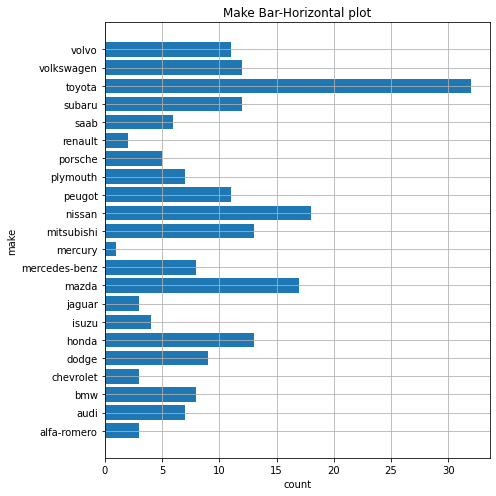

In [72]:
types=['alfa-romero','audi','bmw','chevrolet','dodge','honda','isuzu','jaguar','mazda','mercedes-benz','mercury','mitsubishi','nissan','peugot','plymouth','porsche','renault','saab','subaru','toyota','volkswagen','volvo']
count=np.zeros(22)
for x in make:
    count[types.index(x)]+=1
plt.figure(figsize=(7,7))
plt.barh(types,count)
plt.title('Make Bar-Horizontal plot')
plt.xlabel('count')
plt.ylabel('make')
plt.grid()
plt.tight_layout()
plt.show()

Pie-Plot for Engine type: 

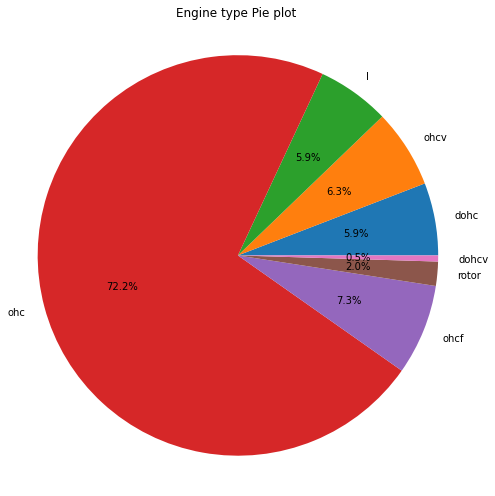

In [73]:
types=['dohc','ohcv','l','ohc','ohcf','rotor','dohcv']
count=np.zeros(7)
for x in engine_type:
    count[types.index(x)]+=1
plt.figure(figsize=(7,7))
plt.pie(count,labels=types,autopct='%1.1f%%')
plt.title('Engine type Pie plot')
plt.axis('equal')
plt.tight_layout()
plt.show()

Box-Plot for Length: 

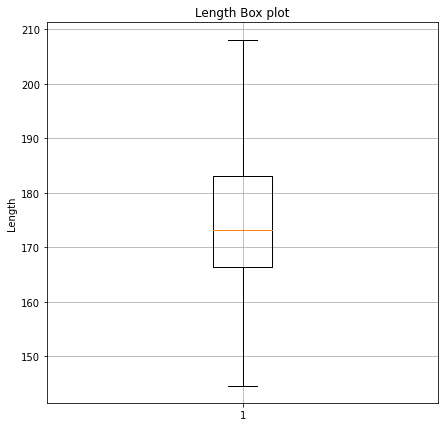

In [74]:
plt.figure(figsize=(7,7))
plt.boxplot(length, showfliers=False)
plt.title('Length Box plot')
plt.ylabel('Length')
plt.grid()
plt.show()

Histogram for City-MPG:

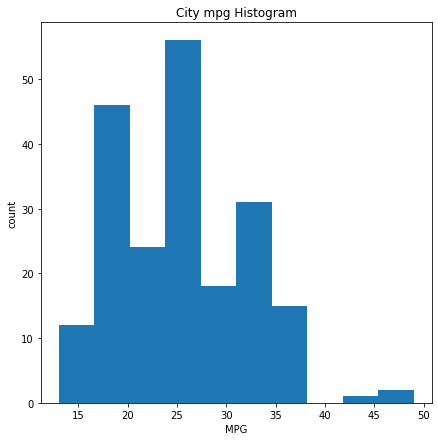

In [75]:
plt.figure(figsize=(7,7))
plt.hist(city_mpg)
plt.title('City mpg Histogram')
plt.xlabel('MPG')
plt.ylabel('count')
plt.show()

Pie-Plot for Fuel type: 

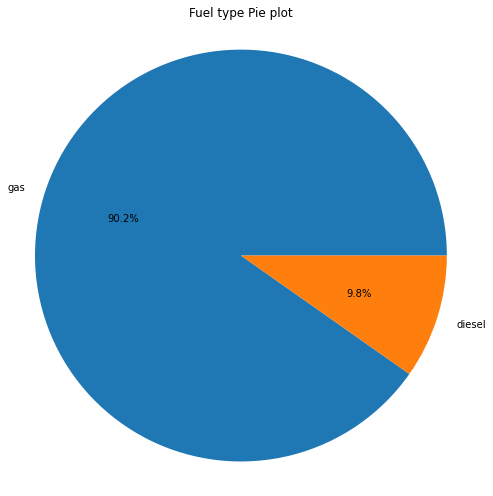

In [76]:
types=['gas','diesel']
count=np.zeros(2)
for x in fuel_type:
    count[types.index(x)]+=1
plt.figure(figsize=(7,7))
plt.pie(count,labels=types,autopct='%1.1f%%')
plt.title('Fuel type Pie plot')
plt.axis('equal')
plt.tight_layout()

Bar-Plot for Number of cylinders: 

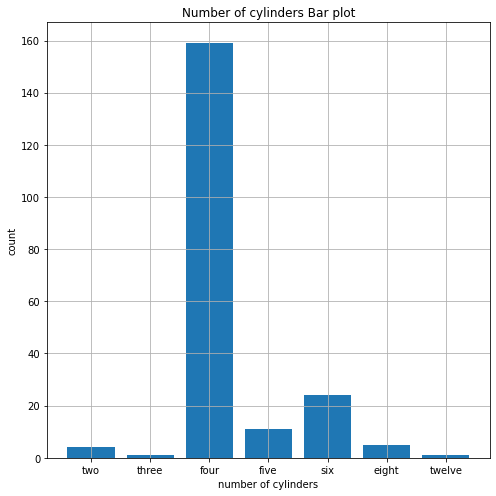

In [77]:
types=['two','three','four','five','six','eight','twelve']
count=np.zeros(7)
for x in num_of_cylinders:
    count[types.index(x)]+=1
plt.figure(figsize=(7,7))
plt.bar(types,count)
plt.title('Number of cylinders Bar plot')
plt.xlabel('number of cylinders')
plt.ylabel('count')
plt.grid()
plt.tight_layout()
plt.show()

## Part b:

hypothesis test 1:

In [31]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
titles = ["city_mpg"]
Attributes = ps.read_csv('E:\Desktop\Automobile_data.csv',usecols=titles)
city_mpg = Attributes.city_mpg.to_list()
n=20
X=np.random.choice(city_mpg,n)
mean=sum(X)/n
var=sum((X-mean)**2)/n
min_=mean-1.96*(var/n)**(1/2)
max_=mean+1.96*(var/n)**(1/2)
print(f'Confidence interval for length of the cars: ({round(min_,2)},{round(max_,2)})')
sup=25
if sup>=min_ and sup<=max_:
    print('The assumption is NOT FALSE')
else:
    print('The assumption is FALSE')

Confidence interval for length of the cars: (22.39,27.11)
The assumption is NOT FALSE


hypothesis test 2:

In [21]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
titles = ["height"]
Attributes = ps.read_csv('E:\Desktop\Automobile_data.csv',usecols=titles)
height = Attributes.height.to_list()
n=50
X=np.random.choice(height,n)
mean=sum(X)/n
var=sum((X-mean)**2)/n
min_=mean-1.96*(var/n)**(1/2)
max_=mean+1.96*(var/n)**(1/2)
print(f'Confidence interval for length of the cars: ({round(min_,2)},{round(max_,2)})')
sup=55
if sup>=min_ and sup<=max_:
    print('The assumption is NOT FALSE')
else:
    print('The assumption is FALSE')

Confidence interval for length of the cars: (52.64,53.96)
The assumption is FALSE


## Part c:

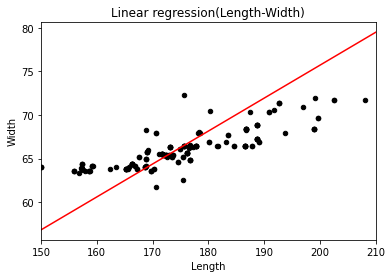

In [12]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
titles = ["length","width"]
Attributes = ps.read_csv('E:\Desktop\Automobile_data.csv',usecols=titles)
X = Attributes.length.to_list()
Y = Attributes.width.to_list()
n=205
meanY,meanX,varX,covXY=0,0,0,0
for i in range(n):
    meanX+=X[i]/n
    meanY+=Y[i]/n
    varX+=X[i]**2/n
    covXY+=X[i]*Y[i]/n
x=np.linspace(150,210,10)
y=covXY/varX*(x-meanX)+meanY
plt.plot(x,y,'r')
plt.scatter(X,Y,s=20,color='black')
plt.xlim([150,210])
plt.title('Linear regression(Length-Width)')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

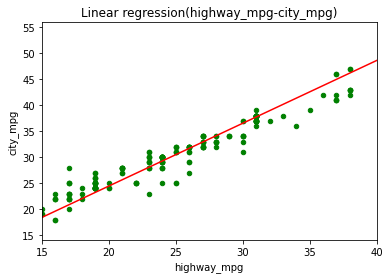

In [6]:
titles = ["highway_mpg","city_mpg"]
Attributes = ps.read_csv('E:\Desktop\Automobile_data.csv',usecols=titles)
X = Attributes.city_mpg.to_list()
Y = Attributes.highway_mpg.to_list()
n=205
meanY,meanX,varX,covXY=0,0,0,0
for i in range(n):
    meanX+=X[i]/n
    meanY+=Y[i]/n
    varX+=X[i]**2/n
    covXY+=X[i]*Y[i]/n
x=np.linspace(15,40,10)
y=covXY/varX*(x-meanX)+meanY
plt.plot(x,y,'r')
plt.scatter(X,Y,s=20,color='green')
plt.xlim([15,40])
plt.title('Linear regression(highway_mpg-city_mpg)')
plt.xlabel('highway_mpg')
plt.ylabel('city_mpg')
plt.show()